# [exp 02]: Resizing Contour Image & Apply MorphologyEx on Edges

# Introduction

We relied on resizing Contour images in context of object detection because it's  power and it offers several benefits in many criteria during processing:
- Memory Storage Efficiency: Resizing contour images can reduce memory consumption, especially we have a large dataset images.

- Speed Processing Optimization: Resizing contour images can help us to faster processing times, as operations performed on smaller images typically require less computational effort, this also help Algorithms such as contour detection, feature extraction, and object recognition to run more efficiently on resized images, this resulting in shorter processing times.

We try to get the best countour size by taking different sizes and manipulate each of them individually 

To make significant enhancements to the Contours We try to apply some Morphological operations to reduse the Noise.

## Implementation

We convert an input image to its edges using Canny edge detection algorithm with some additional preprocessing steps: 

- Determine Lower and Upper Thresholds: by caclulating as 70% of the median intensity value for lower threshold and 130% of the median intensity value for the upper threshold (ensuring that it's at least 0 and that it's at most 255 for lower and upper threshold respectively).

- Apply Blur using a specified blur kernel size (3*3): blur helps to smooth the image and reduce noise, which can improve the accuracy of edge detection.

Once we get the edges we find and draw the External Contours (where contourIdx parameter with value -1 refer to external contour regardless the object Id) then apply resizing operation on several contour image sizes (0.4, 0.5, 0.6, 0.7, 0.8).

For more enhancements we apply CLOSE morph operation on contour image.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [12]:
img = cv2.imread('img/01/img_01_1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
def img_to_edges(img):

    img_med = np.median(img)
    img_med_lower = int(max(0, 0.7 * img_med))
    img_med_upper = int(min(255, 1.3 * img_med))

    img_blur = cv2.blur(img, (5, 5))
    img_edges = cv2.Canny(img_blur, img_med_lower, img_med_upper)
    
    return img_edges

In [9]:
def edges_to_contours(edges, color=(255, 255, 255), thickness=3):
    contours, _ = cv2.findContours(edges,
                                   cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE
                                   )

    edges_contours = cv2.drawContours(np.zeros_like(edges),
                                      contours, -1,
                                      color,
                                      thickness
                                      )

    return edges_contours

## Resize Contours to Multiple Scales

In [10]:
img_edges = img_to_edges(img_gray)
img_edges_contours = edges_to_contours(img_edges)

output_dir = 'out/01'
os.makedirs(output_dir, exist_ok=True)
for perc in [0.4, 0.5, 0.6, 0.7, 0.8]:

    new_shape = tuple(int(v * perc) for v in img_edges_contours.shape)

    img_edges_contours_resized = cv2.resize(img_edges_contours, new_shape[::-1])
    
    output_path = os.path.join(output_dir, f'resized_{perc:.2f}.jpg')
    cv2.imwrite(output_path, img_edges_contours_resized)

## Apply MorphologyEx on Edges and Draw Contours

(-0.5, 860.5, 492.5, -0.5)

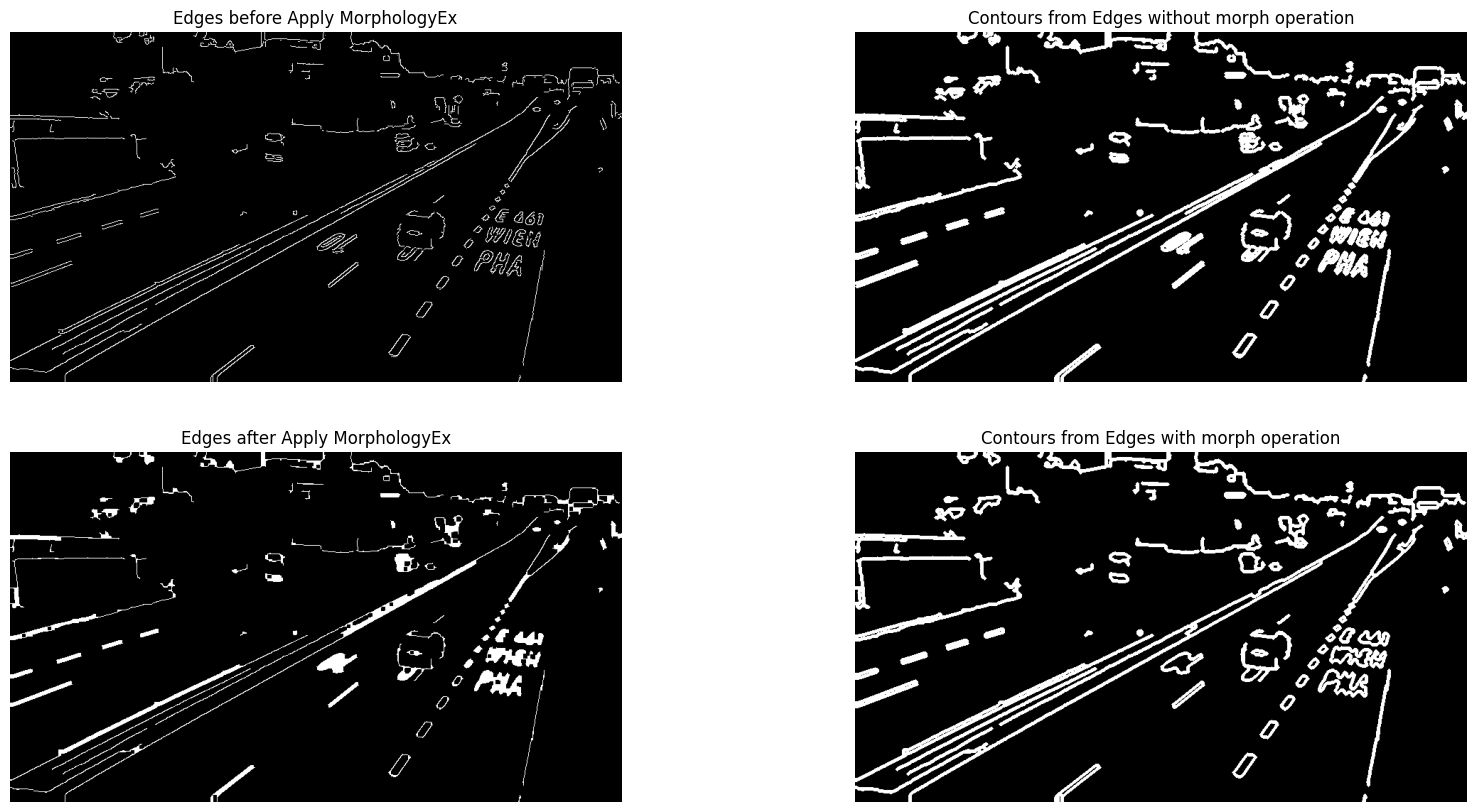

In [11]:
img_edges_morph = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))

img_edges_no_morph_contours = edges_to_contours(img_edges)
img_edges_morph_contours = edges_to_contours(img_edges_morph)

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges before Apply MorphologyEx')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_edges_no_morph_contours, cmap='gray')
plt.title('Contours from Edges without morph operation')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_edges_morph, cmap='gray')
plt.title('Edges after Apply MorphologyEx')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_edges_morph_contours, cmap='gray')
plt.title('Contours from Edges with morph operation')
plt.axis('off')

# Conclusion

- We end with 0.6 size during resizing process [this currently done by evaluating some random videos frames]. 

- By applying Morphological operation we can see clearly that it refine the contours of objects by filling gaps, closing small breaks, and smoothing jagged edges. This enhances the completeness and continuity of contours, making them more suitable for precise object recognition.

 <u>**Note:**</u> to keep it simple all the results until now done with visually evaluation, later we are going to use more advanced techniques that help us to improve the process.